In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

In [5]:
tickers = '^BVSP USDBRL=X'
carteira = yf.download(tickers, start = '2005-01-01')['Close']

[*********************100%%**********************]  2 of 2 completed


In [6]:
carteira

,USDBRL=X,^BVSP
Date,,
2005-01-03,NaN,25722.0
2005-01-04,NaN,24848.0
2005-01-05,NaN,24692.0
2005-01-06,NaN,24367.0
2005-01-07,NaN,24747.0
...,...,...
2023-08-22,4.9787,116156.0
2023-08-23,4.9371,118135.0
2023-08-24,4.8551,117026.0


In [7]:
carteira.dropna(inplace = True)
carteira

,USDBRL=X,^BVSP
Date,,
2006-03-24,2.1547,37577.0
2006-03-27,2.1503,37641.0
2006-03-28,2.1677,36682.0
2006-03-29,2.2206,37492.0
2006-03-30,2.1922,37777.0
...,...,...
2023-08-21,4.9669,114429.0
2023-08-22,4.9787,116156.0
2023-08-23,4.9371,118135.0


In [9]:
carteira.columns = ['DOLAR','IBOV']
carteira

,DOLAR,IBOV
Date,,
2006-03-24,2.1547,37577.0
2006-03-27,2.1503,37641.0
2006-03-28,2.1677,36682.0
2006-03-29,2.2206,37492.0
2006-03-30,2.1922,37777.0
...,...,...
2023-08-21,4.9669,114429.0
2023-08-22,4.9787,116156.0
2023-08-23,4.9371,118135.0


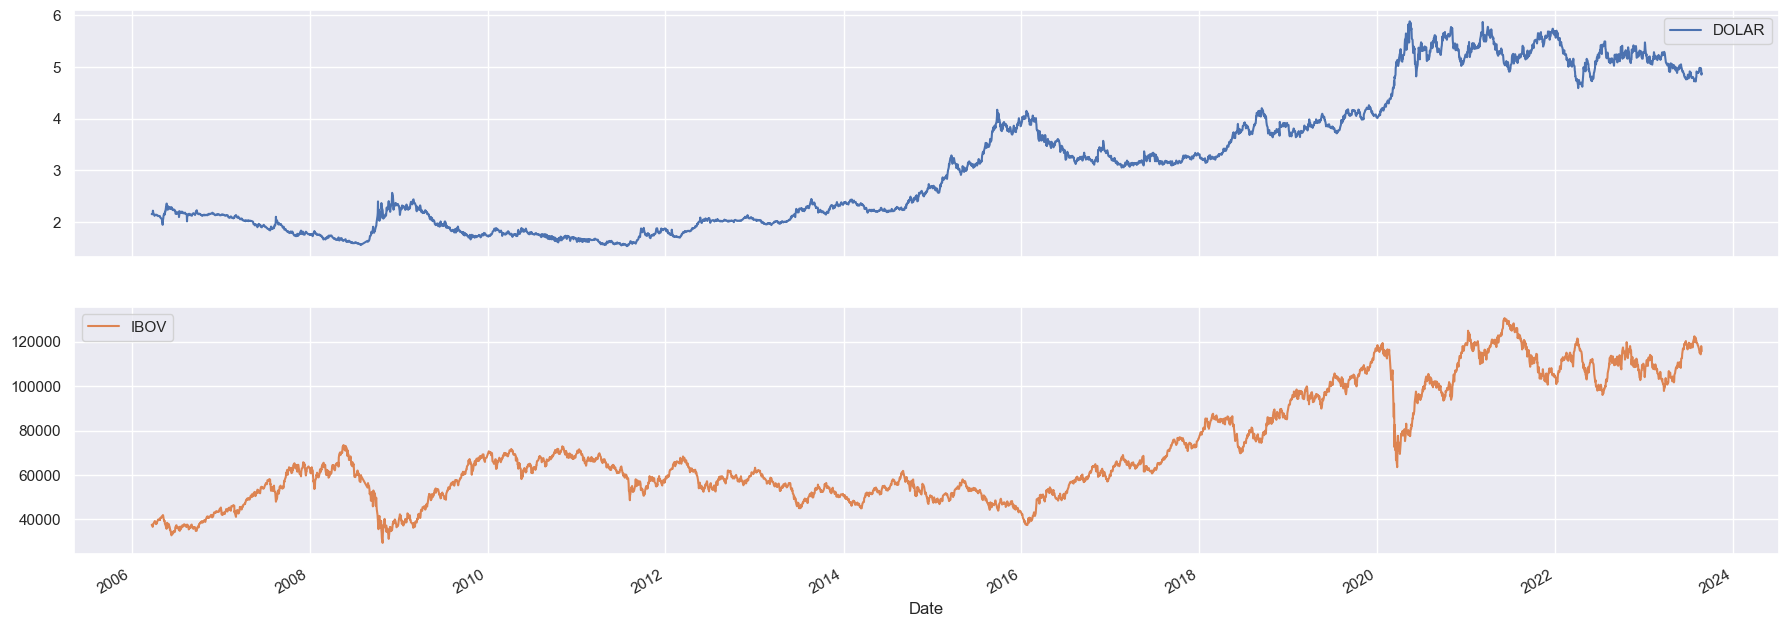

In [10]:
sns.set()
carteira.plot(subplots = True, figsize=(22,8));

<Axes: xlabel='Date'>

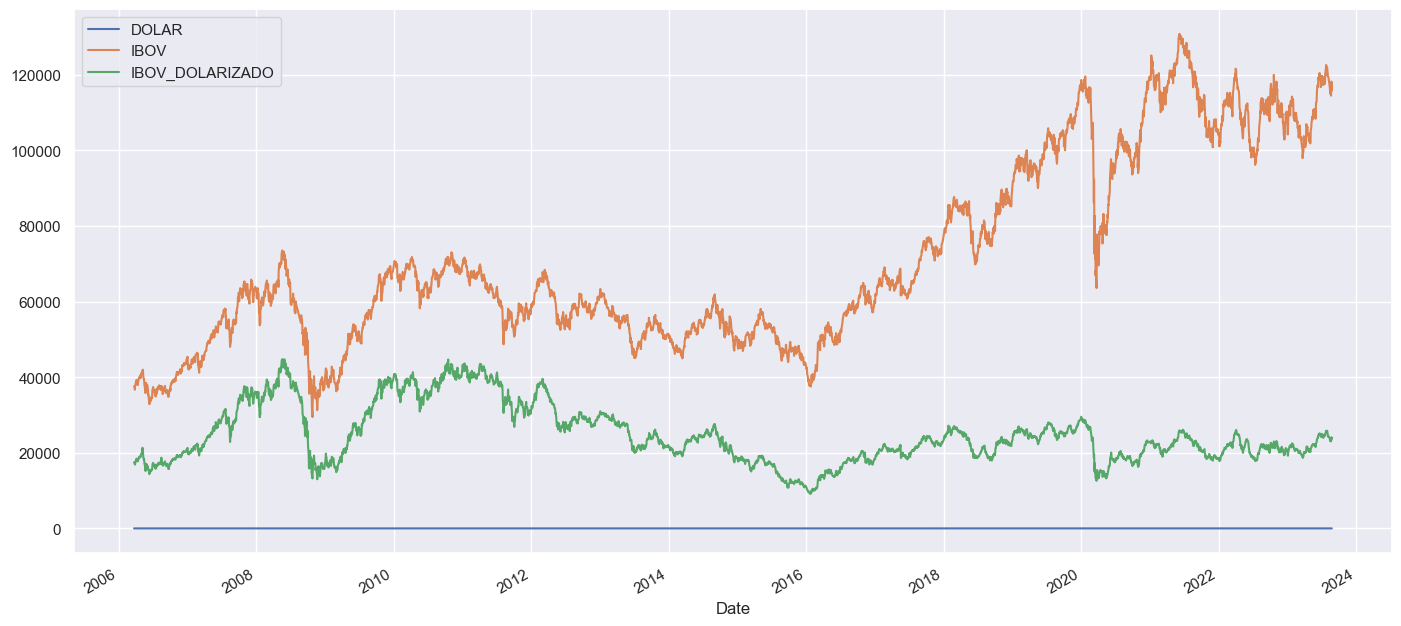

In [11]:
carteira['IBOV_DOLARIZADO'] = carteira['IBOV'] / carteira['DOLAR']
carteira.plot(figsize=(17,8))

In [12]:
retorno = carteira.pct_change()[1:]
retorno

,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2006-03-27,-0.002042,0.001703,0.003753
2006-03-28,0.008092,-0.025478,-0.033300
2006-03-29,0.024404,0.022082,-0.002267
2006-03-30,-0.012789,0.007602,0.020655
2006-03-31,-0.011404,0.004632,0.016221
...,...,...,...
2023-08-21,-0.001729,-0.008492,-0.006775
2023-08-22,0.002376,0.015092,0.012686
2023-08-23,-0.008356,0.017037,0.025607


In [13]:
retorno.describe()

,DOLAR,IBOV,IBOV_DOLARIZADO
count,4277.000000,4277.000000,4277.000000
mean,0.000264,0.000414,0.000327
std,0.012051,0.017323,0.022532
min,-0.104792,-0.147797,-0.178573
25%,-0.006057,-0.008310,-0.010882
50%,0.000000,0.000560,0.000264
75%,0.006258,0.009552,0.012271
max,0.101524,0.146560,0.212511


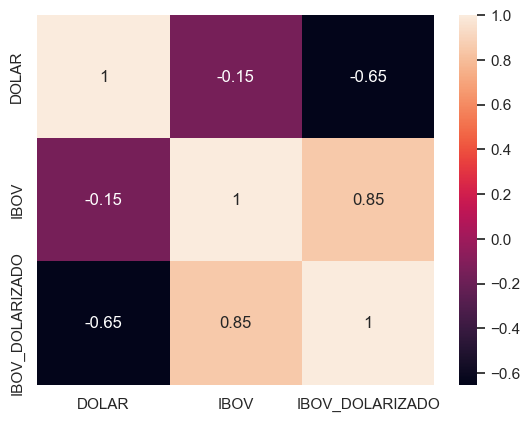

In [14]:
sns.heatmap(retorno.corr(), annot = True);

<Axes: xlabel='Date'>

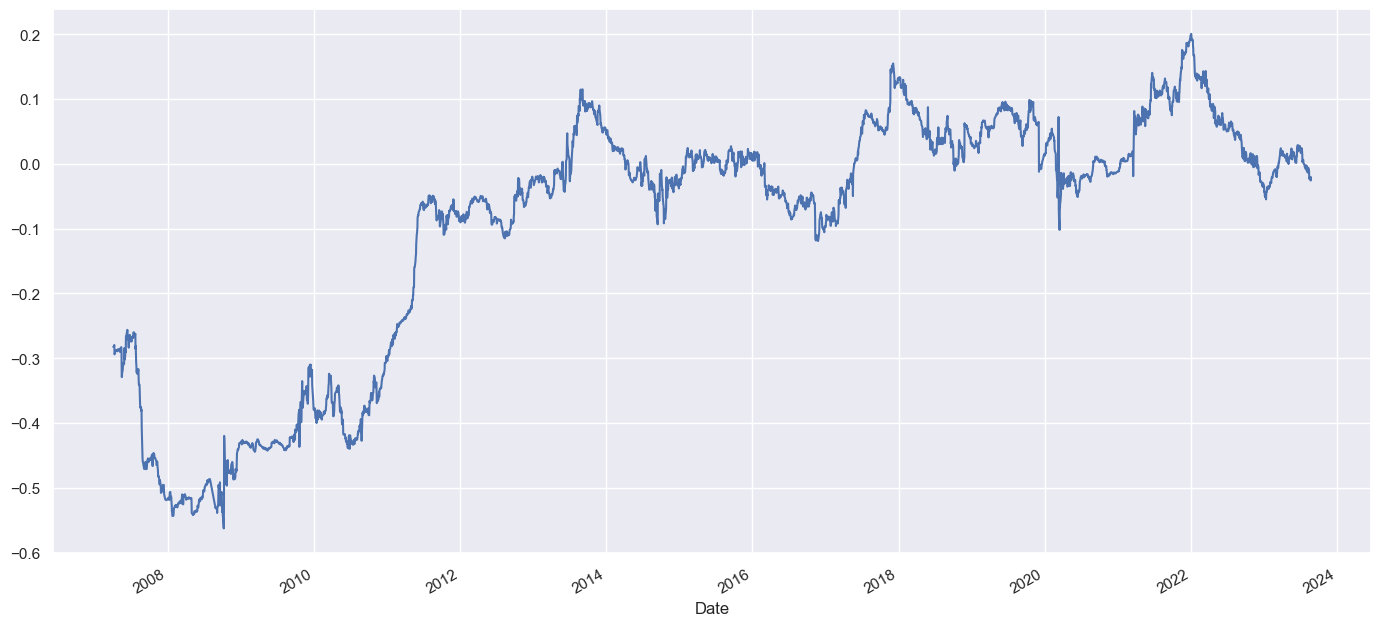

In [15]:
retorno['DOLAR'].rolling(252).corr(retorno['IBOV']).plot(figsize=(17,8))